# 11-5 SVM 中使用多项式特征和核函数 

本节开始处理非线性可分的数据。

老套路就是使用多项式特征。uu

make_moons(noise=0.15,random_state=666)


1. 使用多项式特征以后，在使用线性 SVC
2. 使用多项式核函数的 SVC

```python
from sklearn.svm import SVC

SVC(kernel='poly', degree=degree, C=C)
```

### 使用 sklearn.datasets.make_moons() 方法制造测试数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from sklearn import datasets

X, y = datasets.make_moons()
X.shape, y.shape

((100, 2), (100,))

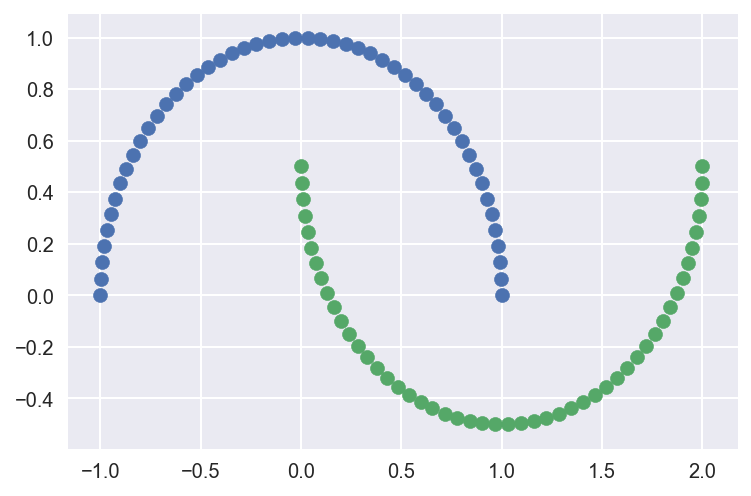

In [2]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

给数据制造一些噪音。

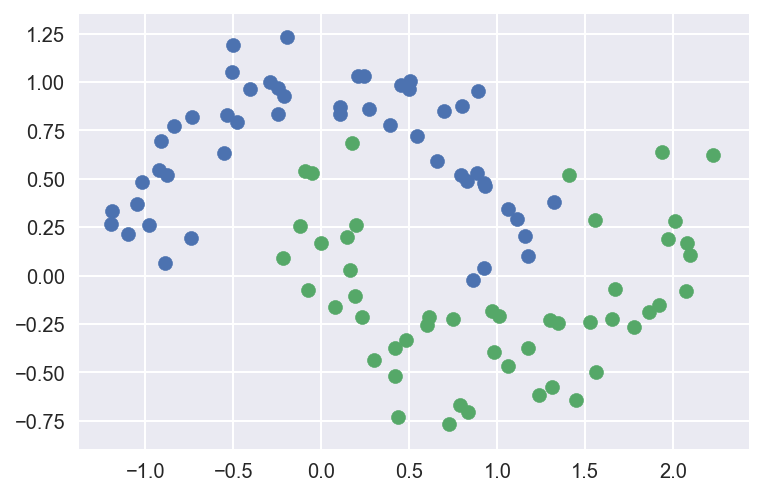

In [3]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

### 使用多项式特征的 SVM

+ 当数据线性不可分的时候，我们可以对数据先构造多项式特征，然后一定要记得标准化

In [4]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline


def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('linearSVC', LinearSVC(C=C))
    ])

In [5]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [6]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(
            (axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(
            (axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

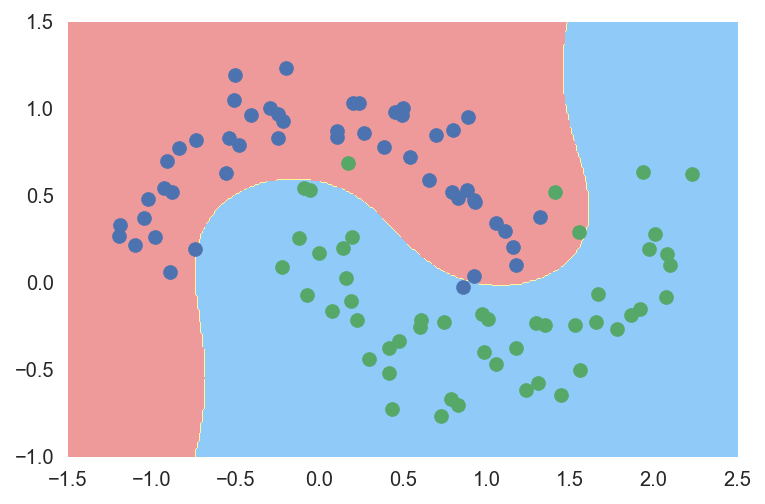

In [7]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [8]:
poly_svc.score(X, y)

0.96

我们此时取 degree = 3 ，可以看到分类的效果还不错。

下面，我们使用非线性的 SVM，通过多项式核函数来进行 SVM 分类

## 使用多项式核函数进行 SVM 分类

In [9]:
from sklearn.svm import SVC


def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ('std', StandardScaler()),
        ('kernelSVC', SVC(kernel='poly', degree=degree, C=C))
    ])

In [10]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

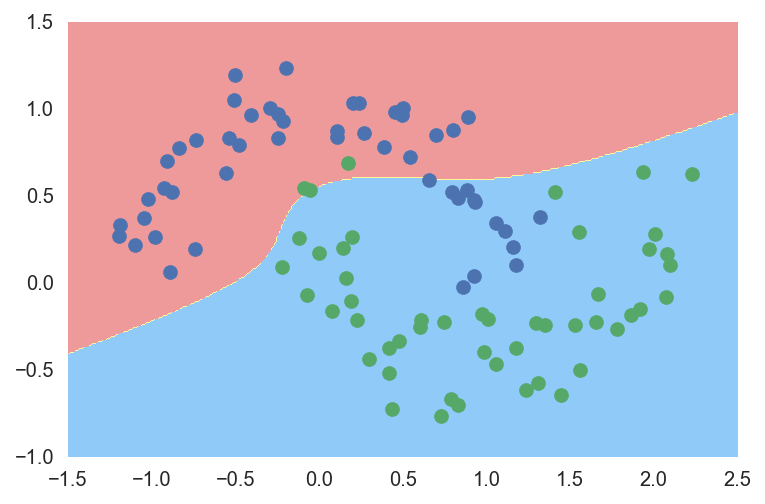

In [11]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [12]:
poly_kernel_svc.score(X, y)

0.84

测试不同的 degree

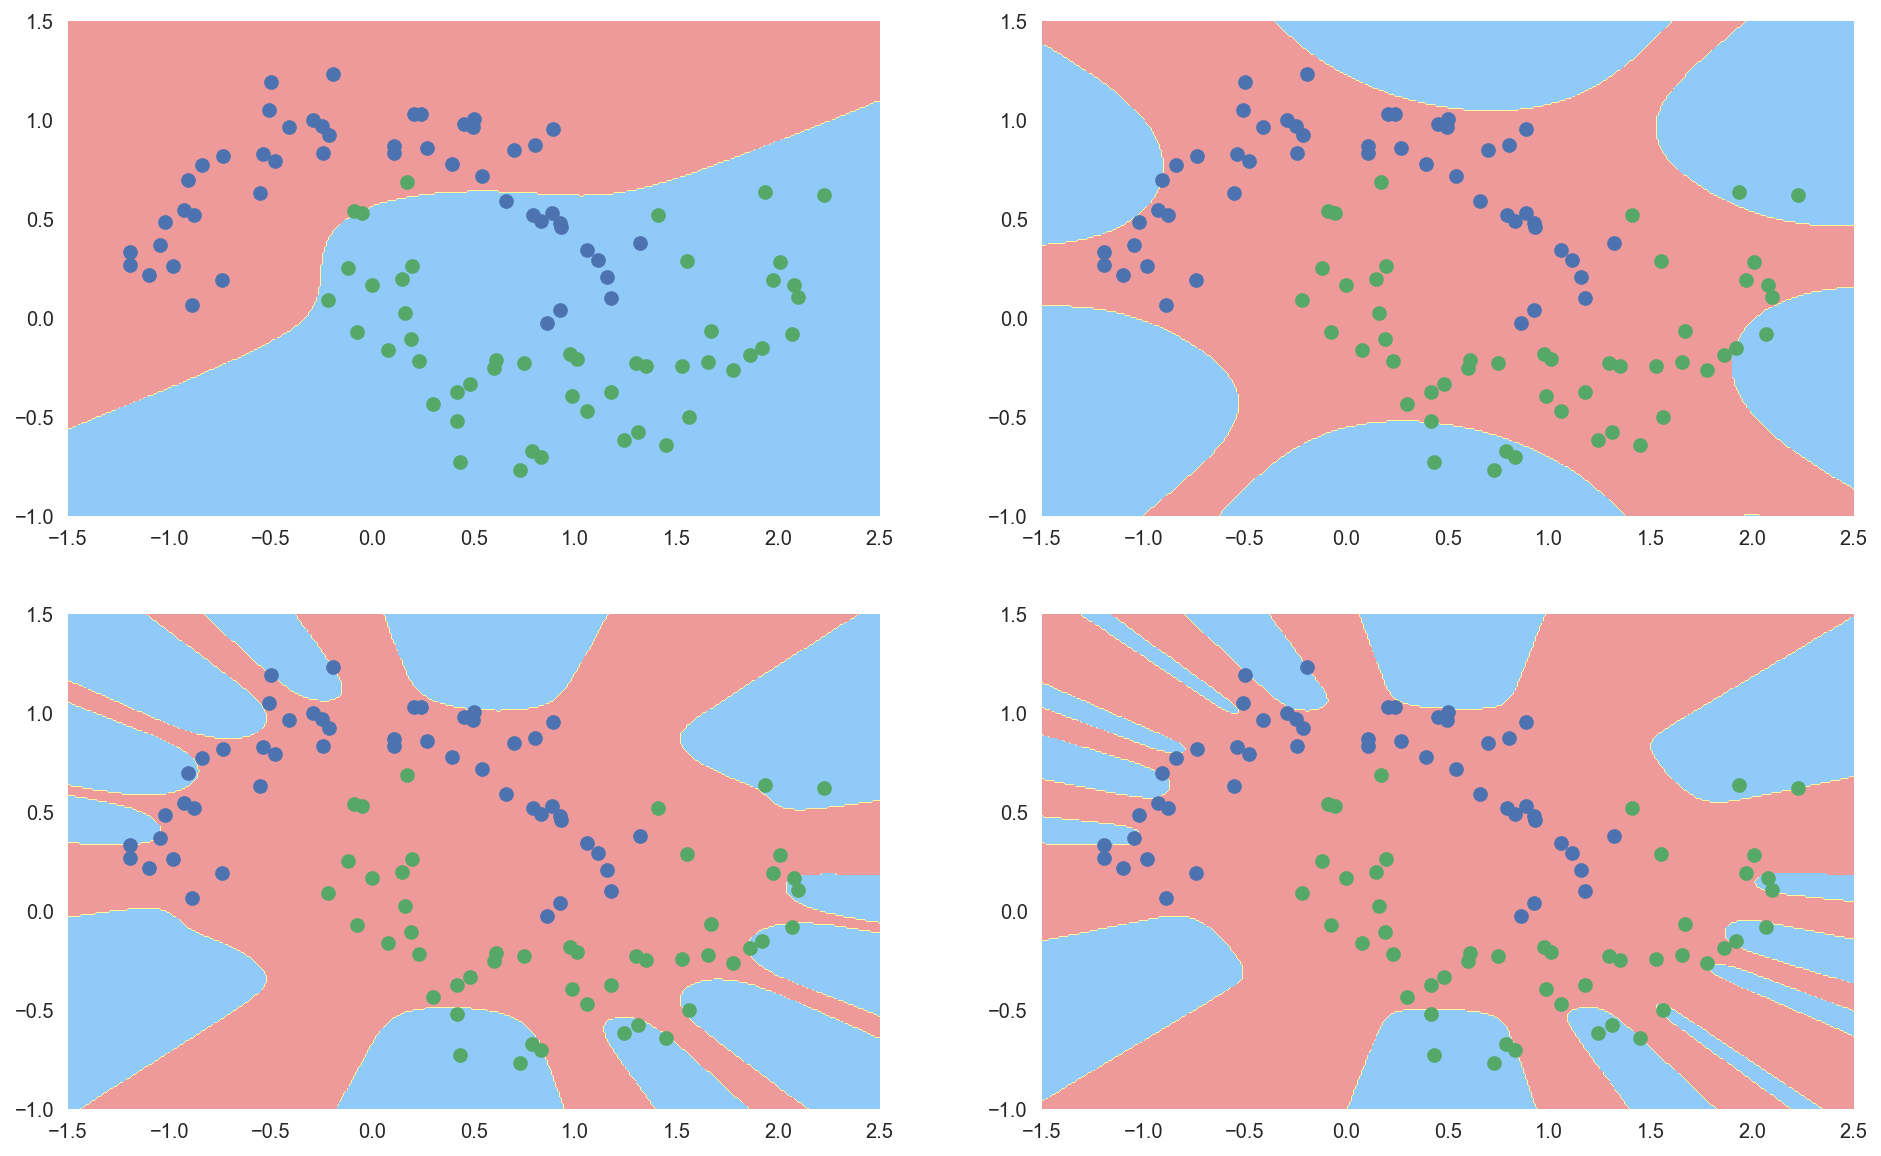

In [13]:
degree_list = [5, 10, 20, 30]

plt.figure(figsize=(16, 10))
for index, degree in enumerate(degree_list):
    plt.subplot(2, 2, index + 1)
    poly_kernel_svc_degree20 = PolynomialKernelSVC(degree=degree)
    poly_kernel_svc_degree20.fit(X, y)
    plot_decision_boundary(poly_kernel_svc_degree20,
                           axis=[-1.5, 2.5, -1.0, 1.5])
    plt.scatter(X[y == 0, 0], X[y == 0, 1])
    plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()